## Necessary libraries

In [1]:
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
import cv2
import cc3d
import pandas as pd

from collections import Counter

In [2]:
WORK_DIR = '.'

# If you don't work on Jupyter, just comment below lines
WORK_DIR = '../'
sys.path.append('..')

In [3]:
from utils import data
from config import cfg

## Example images

In [4]:
metadata = pd.read_csv(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'metadata.csv'), index_col=0)
metadata.head()

,class,path_flair_image,path_t1_image,path_mask_brain,path_mask_segmentation
id,,,,,
1,0,AR-1/ax CUBE flair ar-1_2.mhd,AR-1/AX T1 3D ar-1.mhd,brain_masks/ar-1.npy,AR-1/Segmentation-label.mhd
2,0,AR-2/AX FLAIR AR 2.mhd,AR-2/AX T1 AR-2.mhd,brain_masks/ar-2.npy,AR-2/Segmentation_1-label.mhd
3,0,AR-3/Ax 3D Cube FLAIR AR-3.mhd,AR-3/AX T1 3DC AR-3.mhd,brain_masks/ar-3.npy,AR-3/Segmentation_2-label.mhd
4,0,AR-4/ax flair AR-4.mhd,AR-4/AX T1 AR-4.mhd,brain_masks/ar-4.npy,AR-4/Segmentation-label_1.mhd
6,0,AR-6/AX FLAIR AR-6.mhd,AR-6/AX T1 AR-6_1.mhd,brain_masks/ar-6.npy,AR-6/Segmentation-label.mhd


In [5]:
flair_examples = []
t1_examples = []

for row in metadata[['path_flair_image', 'path_t1_image']].values[:9]:
    flair_examples += [data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], row[0]))]
    t1_examples += [data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], row[1]))]

In [6]:
print('Flair image size:', flair_examples[0][0].shape)
print('T1 image size:', t1_examples[0][0].shape)

Flair image size: (512, 512, 252)
T1 image size: (320, 256, 256)


## Morphological operations

FLAIR

In [7]:
EXAMPLE_IMAGE_FLAIR_2 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-2', 'AX FLAIR AR 2.mhd'))
EXAMPLE_IMAGE_FLAIR_3 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-3', 
                                                   'Ax 3D Cube FLAIR AR-3.mhd'))
EXAMPLE_IMAGE_FLAIR_4 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-4', 
                                                   'ax flair AR-4.mhd'))
# EXAMPLE_IMAGE_FLAIR_5 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-5', 
#                                                    'ax fl kda brfore.mhd'))
EXAMPLE_IMAGE_FLAIR_6 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-6', 
                                                   'AX FLAIR AR-6.mhd'))
EXAMPLE_IMAGE_FLAIR_7 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-7', 
                                                   'AX FLAIR CUBE AR-7.mhd'))
EXAMPLE_IMAGE_FLAIR_8 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-8', 
                                                   'AX FLAIR CUBE AR-8.mhd'))
EXAMPLE_IMAGE_FLAIR_9 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-9', 
                                                   'AX FLAIR AR-9.mhd'))
EXAMPLE_IMAGE_FLAIR_10 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-10', 
                                                   'AX Flair AR-10.mhd'))


EXAMPLE_IMAGE_T1_8 = data.load_itk(os.path.join(WORK_DIR, cfg.routes['data_dir'], 'AR-8', 
                                                   'AX T1 AR-8.mhd'))

**Note**

This parameters are not common for all images, you should change them for greater accuracy

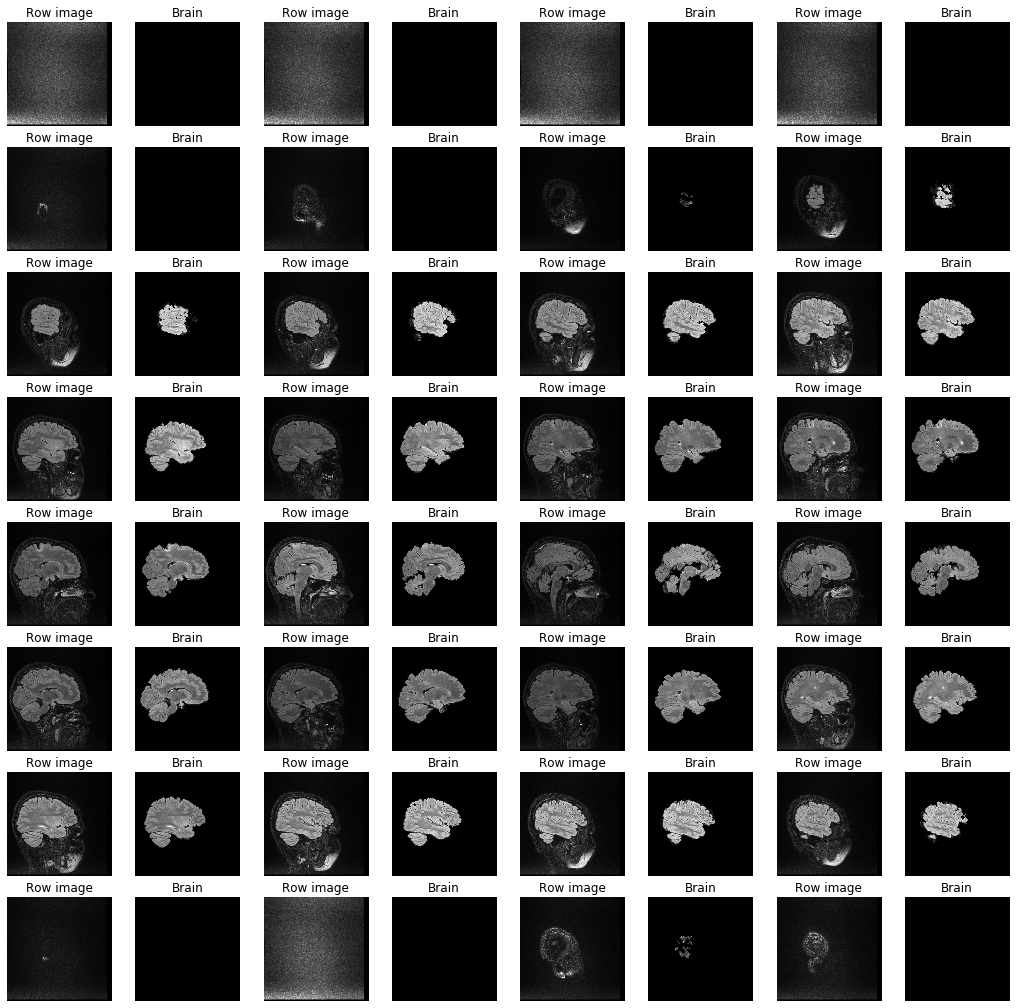

In [8]:
from scipy import ndimage
from skimage import morphology

struct = ndimage.generate_binary_structure(3, 1)
init_image = EXAMPLE_IMAGE_FLAIR_10[0]

thr, segm_image = cv2.threshold(init_image, 170, 255, cv2.THRESH_BINARY)
segm_image = ndimage.binary_opening(segm_image, struct, iterations=14)
segm_image = cc3d.connected_components(segm_image.astype('uint8'), connectivity=26)
i_max = Counter(segm_image.flat).most_common(2)[1][0]
segm_image = segm_image * (segm_image == i_max)
segm_image = ndimage.binary_dilation(segm_image, struct, iterations=5)

data.show_slices_from_images(n_images=2, images=[init_image, init_image * (segm_image != 0)], plane='sagittal',
                             titles=['Row image', 'Brain'], plt=plt, rows=8, cols=8)

In [9]:
# np.save('../train_val_data/brain_masks/ar-10', (segm_image != 0))

In [10]:
# import nibabel as nib

# brain = nib.load(os.path.join('..', 'train_val_data', 'norma 2 rs/ax flair norma 2 rs.mgh')).get_fdata()
# print(brain.shape)

# data.show_slices(brain, plt=plt, plane='axial', rows=6,cols=6)